In [1]:
## Basic
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
## Excel
import os
#import xlwt
from openpyxl import load_workbook
## Data process
from scipy.interpolate import interp1d #Interpolation
from scipy.signal import savgol_filter #Smo oth
import math
from math import dist
import time

import cv2

import random
from IPython import display
# aka import ipympl


In [2]:
cm =1/2.54
def fig_pre_def(fx=8, fy=6,lw=1,dpi = 200):
    cm =1/2.54
    plt.rcParams['figure.dpi'] = dpi
    plt.rc('font', family='Helvetica')         # 自型
    plt.rcParams['axes.linewidth'] = lw     # 設置外框的寬度
    return  plt.figure(figsize=(fx*cm,fy*cm))   
    ax = fig.add_subplot(1, 1, 1)
def fig_post_def(xticks =(None,None),yticks =(None,None), 
                 xlim=(None,None),ylim=(None,None),
                 xlabel = None,ylabel=None,
                 title=None,
                 lg_fs = 6,lb_fs = 8,
                 unit = 1/2.54, SVG = False):
    if xticks[0] != None:
        # Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xticks[0]))    
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xticks[1]))    
    if yticks[0] != None:
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yticks[0]))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(yticks[1]))
    #plt.rc('xtick', labelsize=fontsize)          # X軸數字的文字大小
    #plt.rc('ytick', labelsize=fontsize)          # Y軸數字的文字大小
    ax.tick_params(axis='x', labelsize= lb_fs)
    ax.tick_params(axis='y', labelsize= lb_fs)
    ax.xaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', top='on')    # x軸主要格線
    ax.xaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', top='on')     # x軸次要格線
    ax.yaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', right='on')   # y軸主要格線
    ax.yaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', right='on')   # y軸次要格線
    
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    if xlabel != None:
        ax.set_xlabel(xlabel,fontsize=lb_fs)
    if ylabel != None:
        ax.set_ylabel(ylabel,fontsize=lb_fs)

    if SVG == True:
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])

        new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
        plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
        mpl.rcParams.update(new_rc_params)
    plt.gca().set_position([0, 0, 1, 1])


    plt.legend(fontsize=lg_fs,title=title,title_fontsize=lg_fs,frameon= False)
    plt.rcParams['figure.dpi'] = 80
#cm =1/2.54
#fig = fig_pre_def(6,4.5,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
#plt.scatter(x,y, alpha=0.6,linewidth=0,s=30*cm,label=' ')
#plt.plot(x,y     ,'--ob',markersize=8*cm,linewidth=3*cm,mew=0,label='point source')
#fig_post_def()

In [3]:
def bar_plot(input_x,input_y,binning):
    xs = [input_x[0] - binning/2]
    ys = [0]
    for i in range(len(input_x)):
        xs.append(input_x[i] - binning/2)
        xs.append(input_x[i] + binning/2)
        ys.append(input_y[i])
        ys.append(input_y[i])
    xs.append(input_x[-1] + binning/2)
    ys.append(0)
    return np.array(xs),np.array(ys)


In [4]:
ISO_spectrum = np.loadtxt('../../../data/AmBe_Neutron_spectrum/ISO8529-2.txt')
Lorch_1973 = np.loadtxt('../../../data/AmBe_Neutron_spectrum/Lorch_1973.txt')
Scherzinger_2017 = np.loadtxt('../../../data/AmBe_Neutron_spectrum/Scherzinger_2017.txt')
Scherzinger_2015 = np.loadtxt('../../../data/AmBe_Neutron_spectrum/Scherzinger_2015.txt')

In [80]:
GRAVEL = np.loadtxt('GRAVEL.txt')
#MAXED = np.loadtxt('output_MAXED_20220923.txt')
TOF = np.loadtxt('N_TOF_20220923.txt')
N_scatter = np.loadtxt('../AmBe_neutron_scatter_TOF/Neutron_scatter_3in_30degree_2in_trigger/N_scatter_20221113.txt')
g_trigger = np.loadtxt('../AmBe_neutron_scatter_TOF/Neutron_scatter_3in_30degree_2in_trigger/g_trigger_20221113.txt')
#N_scatter = np.loadtxt('N_scatter_20220923.txt')
Simulated_N_TOF= np.loadtxt('../AmBe_neutron_scatter_TOF/Neutron_scatter_exp_simulation/Simulated_N_TOF.txt')

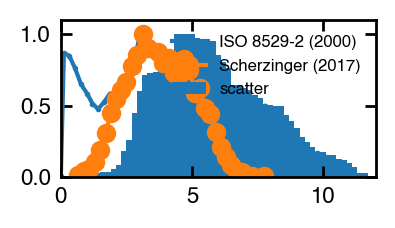

In [81]:

fig = fig_pre_def(4,2,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-',markersize=1,label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(GRAVEL[:,0],GRAVEL[:,1]/GRAVEL[:,1].max(),'-',label='GRAVEL')
#plt.plot(MAXED[:,0],MAXED[:,1]/MAXED[:,1].max(),'-',label='MAXED')
#plt.plot(TOF[:,0],TOF[:,1]/TOF[:,1].max(),'-',label='TOF')
plt.bar(N_scatter[:,0],N_scatter[:,1]/N_scatter[:,1].max(),label='scatter')


fig_post_def(xlim=(0,12),ylim=(0,1.1))

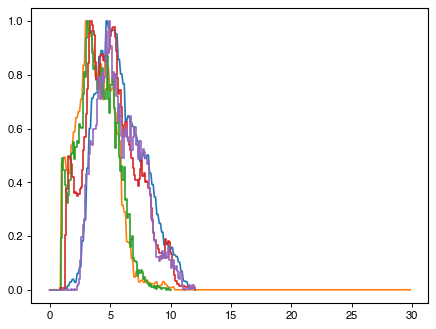

In [82]:
scatter_x,scatter_y = bar_plot(N_scatter[:,0],N_scatter[:,1],0.1)
plt.plot(scatter_x,scatter_y/scatter_y.max())

g_trigger_x,g_trigger_y = bar_plot(g_trigger[:,0],g_trigger[:,1],0.1)
plt.plot(g_trigger_x,g_trigger_y/g_trigger_y.max())
TOF_x,TOF_y = bar_plot(TOF[:,0],TOF[:,1],0.1)
plt.plot(TOF_x,TOF_y/TOF_y.max())
GRAVEL_x,GRAVEL_y = bar_plot(GRAVEL[:,0],GRAVEL[:,1],0.1)
plt.plot(GRAVEL_x,GRAVEL_y/GRAVEL_y.max())
#MAXED_x,MAXED_y = bar_plot(MAXED[:,0],MAXED[:,1],0.1)
#plt.plot(MAXED_x,MAXED_y/MAXED_y.max())

Simulated_N_TOF_x,Simulated_N_TOF_y = bar_plot(Simulated_N_TOF[:,0],Simulated_N_TOF[:,1],0.1)
plt.plot(Simulated_N_TOF_x,Simulated_N_TOF_y/Simulated_N_TOF_y.max())

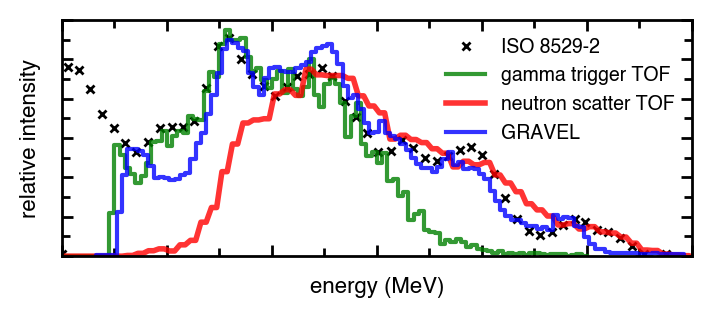

In [83]:

fig = fig_pre_def(8,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[16:,1].max(),'x',color='black',markersize=3,label='ISO 8529-2')
#plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'+',color='darkorange',markersize=4,label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
ax.plot(TOF_x,1.15*TOF_y/TOF_y.max(),'-',color='green',alpha=0.8,linewidth=1.5,label='gamma trigger TOF')
ax.plot(scatter_x,0.95*scatter_y/scatter_y.max(),'-',color='red',alpha=0.8,linewidth=2,label='neutron scatter TOF')
#ax.plot(g_trigger_x,1.1*g_trigger_y/g_trigger_y.max(),'-',color='green',alpha=0.8,linewidth=2,label='gamma trigger TOF')

#ax.plot(N_scatter[:,0],N_scatter[:,1]/N_scatter[:,1].max(),'-',color='red',alpha=0.8,linewidth=1,label='neutron scatter TOF')


#plt.plot(MAXED[5:,0],MAXED[5:,1]/MAXED[5:,1].max(),'-',alpha=0.8,label='MAXED')
#plt.plot(MAXED_x[5:],MAXED_y[5:]/MAXED_y[5:].max(),'-',alpha=0.8,linewidth=1,color='blue',label='MAXED')
plt.plot(GRAVEL_x[:]-0.2,1.1*GRAVEL_y[:]/GRAVEL_y[:].max(),'-',linewidth=1.5,alpha=0.8,color='blue',label='GRAVEL')
#plt.plot(TOF_x,TOF_y/TOF_y.max(),'-',alpha=0.8,color='green',linewidth=1,label='gamma trigger TOF')
#plt.fill_between(TOF_x, 0, TOF_y/TOF_y.max(), color='blue')
#plt.plot(scatter_x,scatter_y/scatter_y.max(),'-',color='dodgerblue',alpha=0.8,linewidth=1,label='neutron scatter TOF')
#plt.fill_between(scatter_x, 0, scatter_y/scatter_y.max(), color='gold')
#plt.plot(Simulated_N_TOF_x,Simulated_N_TOF_y/Simulated_N_TOF_y.max(),linewidth=1,alpha=0.8,color='orange',label='simulated')
#plt.plot(Simulated_N_TOF_x,Simulated_N_TOF_y/Simulated_N_TOF_y.max(),linewidth=1,alpha=0.8,color='orange',label='simulated')
##

fig_post_def(xlim=(0,12),ylim=(0,1.2),xticks=(2,1),yticks=(0.2,0.1),lg_fs=7, xlabel='energy (MeV)',ylabel='relative intensity',SVG=True)
#plt.savefig("plot_spectrum.svg",format="SVG")

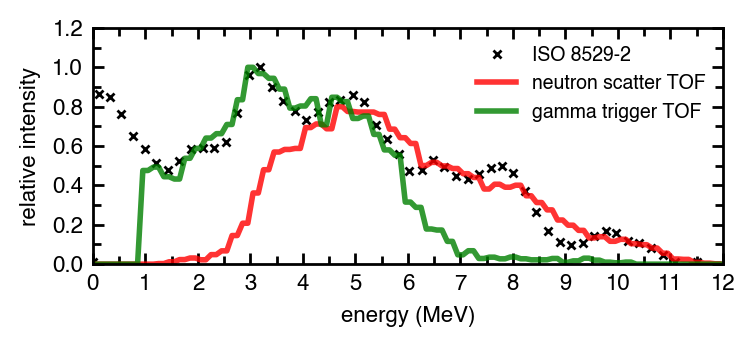

In [86]:

fig = fig_pre_def(8,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'x',color='black',markersize=3,label='ISO 8529-2')
#plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'+',color='darkorange',markersize=4,label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#ax.plot(TOF_x,TOF_y/TOF_y.max(),'-',alpha=0.8,color='blue',linewidth=1,label='gamma trigger TOF')
ax.plot(scatter_x,0.8*scatter_y/scatter_y.max(),'-',color='red',alpha=0.8,linewidth=2,label='neutron scatter TOF')
ax.plot(g_trigger_x,1*g_trigger_y/g_trigger_y.max(),'-',color='green',alpha=0.8,linewidth=2,label='gamma trigger TOF')

#ax.plot(N_scatter[:,0],N_scatter[:,1]/N_scatter[:,1].max(),'-',color='red',alpha=0.8,linewidth=1,label='neutron scatter TOF')


#plt.plot(MAXED[5:,0],MAXED[5:,1]/MAXED[5:,1].max(),'-',alpha=0.8,label='MAXED')
#plt.plot(MAXED_x[5:],MAXED_y[5:]/MAXED_y[5:].max(),'-',alpha=0.8,linewidth=1,color='blue',label='MAXED')
#plt.plot(GRAVEL_x[:]-0.2,GRAVEL_y[:]/GRAVEL_y[:].max(),'-',linewidth=1,alpha=0.8,color='green',label='GRAVEL')
#plt.plot(TOF_x,TOF_y/TOF_y.max(),'-',alpha=0.8,color='green',linewidth=1,label='gamma trigger TOF')
#plt.fill_between(TOF_x, 0, TOF_y/TOF_y.max(), color='blue')
#plt.plot(scatter_x,scatter_y/scatter_y.max(),'-',color='dodgerblue',alpha=0.8,linewidth=1,label='neutron scatter TOF')
#plt.fill_between(scatter_x, 0, scatter_y/scatter_y.max(), color='gold')
#plt.plot(Simulated_N_TOF_x,Simulated_N_TOF_y/Simulated_N_TOF_y.max(),linewidth=1,alpha=0.8,color='orange',label='simulated')
#plt.plot(Simulated_N_TOF_x,Simulated_N_TOF_y/Simulated_N_TOF_y.max(),linewidth=1,alpha=0.8,color='orange',label='simulated')
##

fig_post_def(xlim=(0,12),ylim=(0,1.2),xticks=(1,0.5),yticks=(0.2,0.1),lg_fs=7, xlabel='energy (MeV)',ylabel='relative intensity',SVG=False)
#plt.savefig("plot_spectrum.svg",format="SVG")

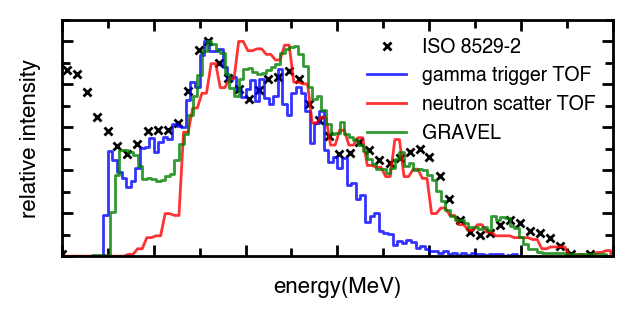

In [104]:

fig = fig_pre_def(7,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'x',color='black',markersize=3,label='ISO 8529-2')
#plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'+',color='darkorange',markersize=4,label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
ax.plot(TOF_x,TOF_y/TOF_y.max(),'-',alpha=0.8,color='blue',linewidth=1,label='gamma trigger TOF')
ax.plot(scatter_x,scatter_y/scatter_y.max(),'-',color='red',alpha=0.8,linewidth=1,label='neutron scatter TOF')
#plt.plot(MAXED[5:,0],MAXED[5:,1]/MAXED[5:,1].max(),'-',alpha=0.8,label='MAXED')
#plt.plot(MAXED_x[5:],MAXED_y[5:]/MAXED_y[5:].max(),'-',alpha=0.8,linewidth=1,color='blue',label='MAXED')
plt.plot(GRAVEL_x[:]-0.2,GRAVEL_y[:]/GRAVEL_y[:].max(),'-',linewidth=1,alpha=0.8,color='green',label='GRAVEL')
#plt.plot(TOF_x,TOF_y/TOF_y.max(),'-',alpha=0.8,color='green',linewidth=1,label='gamma trigger TOF')
#plt.fill_between(TOF_x, 0, TOF_y/TOF_y.max(), color='blue')
#plt.plot(scatter_x,scatter_y/scatter_y.max(),'-',color='dodgerblue',alpha=0.8,linewidth=1,label='neutron scatter TOF')
#plt.fill_between(scatter_x, 0, scatter_y/scatter_y.max(), color='gold')

fig_post_def(xlim=(0,12),ylim=(0,1.1),xticks=(2,1),yticks=(0.2,0.1),lg_fs=7, xlabel='energy(MeV)',ylabel='relative intensity',SVG=True)
plt.savefig("plot_spectrum.svg",format="SVG")

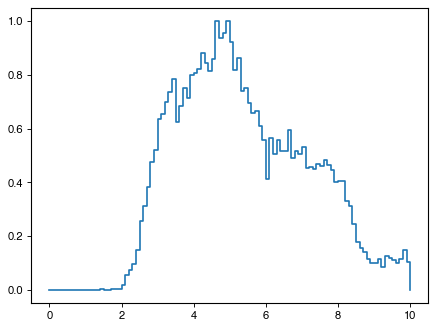

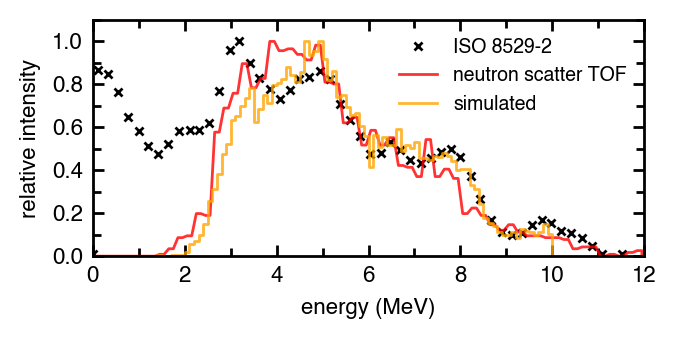

In [106]:

fig = fig_pre_def(7,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'x',color='black',markersize=3,label='ISO 8529-2')
#plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'+',color='darkorange',markersize=4,label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#ax.plot(TOF_x,TOF_y/TOF_y.max(),'-',alpha=0.8,color='blue',linewidth=1,label='gamma trigger TOF')
ax.plot(scatter_x,scatter_y/scatter_y.max(),'-',color='red',alpha=0.8,linewidth=1,label='neutron scatter TOF')
#plt.plot(MAXED[5:,0],MAXED[5:,1]/MAXED[5:,1].max(),'-',alpha=0.8,label='MAXED')
#plt.plot(MAXED_x[5:],MAXED_y[5:]/MAXED_y[5:].max(),'-',alpha=0.8,linewidth=1,color='blue',label='MAXED')
#plt.plot(GRAVEL_x[:]-0.2,GRAVEL_y[:]/GRAVEL_y[:].max(),'-',linewidth=1,alpha=0.8,color='green',label='GRAVEL')
#plt.plot(TOF_x,TOF_y/TOF_y.max(),'-',alpha=0.8,color='green',linewidth=1,label='gamma trigger TOF')
#plt.fill_between(TOF_x, 0, TOF_y/TOF_y.max(), color='blue')
#plt.plot(scatter_x,scatter_y/scatter_y.max(),'-',color='dodgerblue',alpha=0.8,linewidth=1,label='neutron scatter TOF')
#plt.fill_between(scatter_x, 0, scatter_y/scatter_y.max(), color='gold')
plt.plot(Simulated_N_TOF_x,Simulated_N_TOF_y/Simulated_N_TOF_y.max(),linewidth=1,alpha=0.8,color='orange',label='simulated')



fig_post_def(xlim=(0,12),ylim=(0,1.1),xticks=(2,1),yticks=(0.2,0.1),lg_fs=7, xlabel='energy (MeV)',ylabel='relative intensity',SVG=False)
plt.savefig("plot_spectrum.svg",format="SVG")

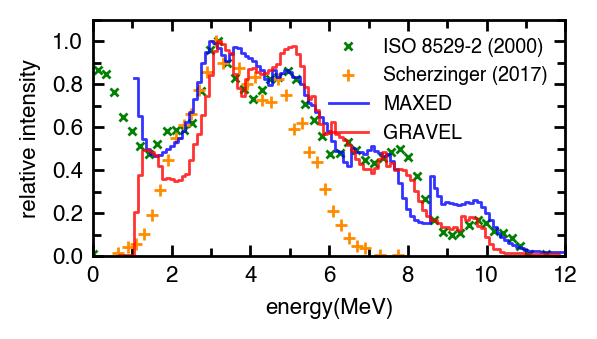

In [89]:

fig = fig_pre_def(6,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'x',color='green',markersize=3,label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'+',color='darkorange',markersize=4,label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')

#plt.plot(MAXED[5:,0],MAXED[5:,1]/MAXED[5:,1].max(),'-',alpha=0.8,label='MAXED')
plt.plot(MAXED_x[5:],MAXED_y[5:]/MAXED_y[5:].max(),'-',alpha=0.8,linewidth=1,color='blue',label='MAXED')
plt.plot(GRAVEL_x[:]-0.2,GRAVEL_y[:]/GRAVEL_y[:].max(),'-',linewidth=1,alpha=0.8,color='red',label='GRAVEL')
#plt.plot(TOF_x,TOF_y/TOF_y.max(),'-',alpha=0.8,color='green',linewidth=1,label='gamma trigger TOF')
#plt.fill_between(TOF_x, 0, TOF_y/TOF_y.max(), color='blue')
#plt.plot(scatter_x,scatter_y/scatter_y.max(),'-',color='dodgerblue',alpha=0.8,linewidth=1,label='neutron scatter TOF')
#plt.fill_between(scatter_x, 0, scatter_y/scatter_y.max(), color='gold')

fig_post_def(xlim=(0,12),ylim=(0,1.1),xticks=(2,1),yticks=(0.2,0.1),lg_fs=7, xlabel='energy(MeV)',ylabel='relative intensity')


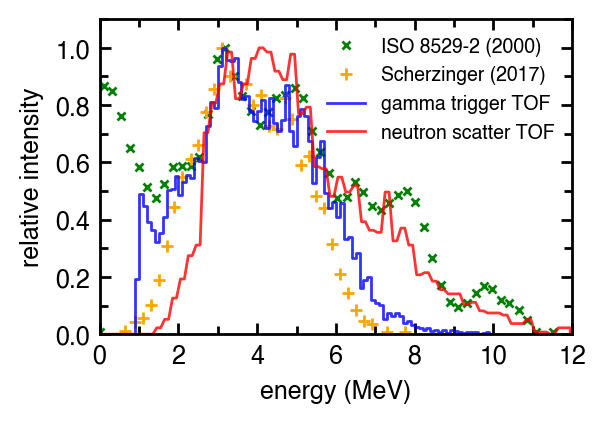

In [90]:

fig = fig_pre_def(6,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'x',color='green',markersize=3,label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'+',color='orange',markersize=4,label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(GRAVEL_x[:]-0.2,GRAVEL_y[:]/GRAVEL_y[:].max(),'-',linewidth=1,alpha=0.5,color='deeppink',label='GRAVEL')
#plt.plot(MAXED[5:,0],MAXED[5:,1]/MAXED[5:,1].max(),'-',alpha=0.8,label='MAXED')
#plt.plot(MAXED_x[5:],MAXED_y[5:]/MAXED_y[5:].max(),'-',alpha=0.5,linewidth=1,color='darkorange',label='MAXED')
plt.plot(TOF_x,TOF_y/TOF_y.max(),'-',alpha=0.8,color='blue',linewidth=1,label='gamma trigger TOF')
#plt.fill_between(TOF_x, 0, TOF_y/TOF_y.max(), color='blue')
plt.plot(scatter_x,scatter_y/scatter_y.max(),'-',color='red',alpha=0.8,linewidth=1,label='neutron scatter TOF')
#plt.fill_between(scatter_x, 0, scatter_y/scatter_y.max(), color='gold')

fig_post_def(xlim=(0,12),ylim=(0,1.1),xticks=(2,1),yticks=(0.2,0.1),lg_fs=7,lb_fs=9,xlabel='energy (MeV)',ylabel='relative intensity')

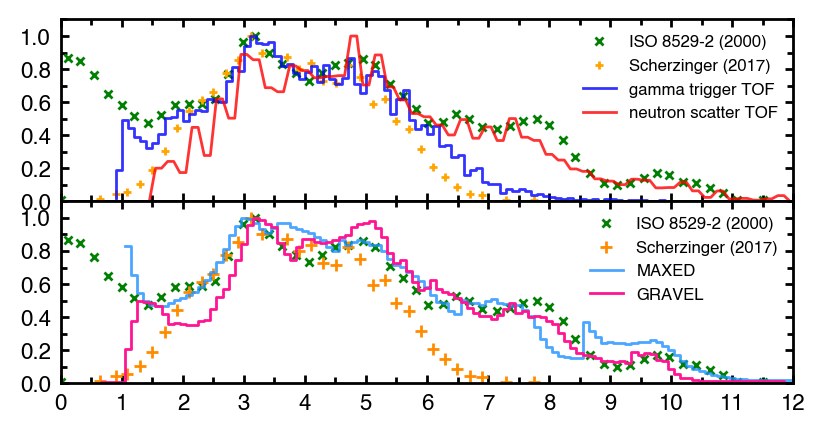

In [43]:

fig = fig_pre_def(12,6,1)# 圖片大小

plt.subplots_adjust(hspace=.0)
ax1 = fig.add_subplot(2, 1, 1)          # 產生1x1格圖片、在第一格
ax1.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'x',color='green',markersize=3,label='ISO 8529-2 (2000)')
ax1.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'+',color='orange',markersize=3,label='Scherzinger (2017)')
ax1.plot(TOF_x,TOF_y/TOF_y.max(),'-',alpha=0.8,color='blue',linewidth=1,label='gamma trigger TOF')
ax1.plot(scatter_x,scatter_y/scatter_y.max(),'-',color='red',alpha=0.8,linewidth=1,label='neutron scatter TOF')
plt.legend(fontsize=6,title_fontsize=6,frameon=False)

ax1.set_xlim((0,12))
ax1.set_ylim((0,1.1))
ax1.tick_params(axis='x', labelsize= 8)
ax1.tick_params(axis='y', labelsize= 8)

ax1.xaxis.set_tick_params(which='major', size=3, width=1, direction='in', top='on')    # x軸主要格線
ax1.xaxis.set_tick_params(which='minor', size=2, width=1, direction='in', top='on')     # x軸次要格線
ax1.yaxis.set_tick_params(which='major', size=3, width=1, direction='in', right='on')   # y軸主要格線
ax1.yaxis.set_tick_params(which='minor', size=2, width=1, direction='in', right='on')
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))    
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    #which='both',      # both major and minor ticks are affected
    #bottom=False)     # ticks along the bottom edge are off
    #top=False,         # ticks along the top edge are off
    labelbottom=False) 

#fig = fig_pre_def(10,2.5,1)# 圖片大小
ax2 = fig.add_subplot(2, 1, 2)          # 產生1x1格圖片、在第一格
ax2.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'x',color='green',markersize=3,label='ISO 8529-2 (2000)')
ax2.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'+',color='darkorange',markersize=4,label='Scherzinger (2017)')
ax2.plot(MAXED_x[5:],MAXED_y[5:]/MAXED_y[5:].max(),'-',alpha=0.8,linewidth=1,color='dodgerblue',label='MAXED')
ax2.plot(GRAVEL_x[:]-0.2,GRAVEL_y[:]/GRAVEL_y[:].max(),'-',linewidth=1,alpha=1,color='deeppink',label='GRAVEL')
plt.legend(fontsize=6,title_fontsize=6,frameon=False)
ax2.xaxis.set_tick_params(which='major', size=3, width=1, direction='in', top='on')    # x軸主要格線
ax2.xaxis.set_tick_params(which='minor', size=2, width=1, direction='in', top='on')     # x軸次要格線
ax2.yaxis.set_tick_params(which='major', size=3, width=1, direction='in', right='on')   # y軸主要格線
ax2.yaxis.set_tick_params(which='minor', size=2, width=1, direction='in', right='on')
ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))    
ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))

ax2.set_xlim((0,12))
ax2.set_ylim((0,1.1))
ax2.tick_params(axis='x', labelsize= 8)
ax2.tick_params(axis='y', labelsize= 8)
#fig_post_def(xlim=(0,12),ylim=(0,1.1),xticks=(2,1),yticks=(0.2,0.1),lg_fs=7.5)

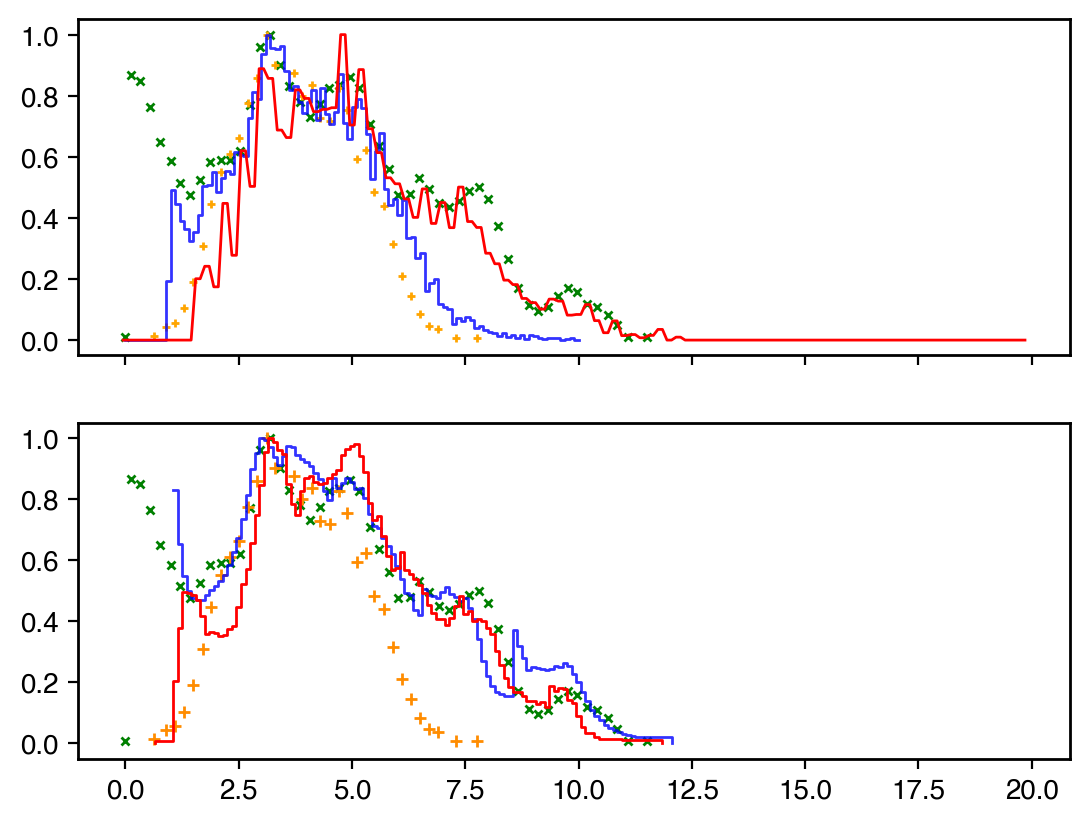

In [44]:

fig, (ax1,ax2) = plt.subplots(nrows=2, sharex=True) # frameon=False removes frames

#plt.subplots_adjust(hspace=.0)

ax1.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'x',color='green',markersize=3,label='ISO 8529-2 (2000)')
ax1.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'+',color='orange',markersize=3,label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(GRAVEL_x[:]-0.2,GRAVEL_y[:]/GRAVEL_y[:].max(),'-',linewidth=1,alpha=0.5,color='deeppink',label='GRAVEL')
#plt.plot(MAXED[5:,0],MAXED[5:,1]/MAXED[5:,1].max(),'-',alpha=0.8,label='MAXED')
#plt.plot(MAXED_x[5:],MAXED_y[5:]/MAXED_y[5:].max(),'-',alpha=0.5,linewidth=1,color='darkorange',label='MAXED')
ax1.plot(TOF_x,TOF_y/TOF_y.max(),'-',alpha=0.8,color='blue',linewidth=1,label='gamma trigger TOF')
#plt.fill_between(TOF_x, 0, TOF_y/TOF_y.max(), color='blue')
ax1.plot(scatter_x,scatter_y/scatter_y.max(),'-',color='red',alpha=1,linewidth=1,label='neutron scatter TOF')

ax2.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'x',color='green',markersize=3,label='ISO 8529-2 (2000)')
ax2.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'+',color='darkorange',markersize=4,label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')

#plt.plot(MAXED[5:,0],MAXED[5:,1]/MAXED[5:,1].max(),'-',alpha=0.8,label='MAXED')
ax2.plot(MAXED_x[5:],MAXED_y[5:]/MAXED_y[5:].max(),'-',alpha=0.8,linewidth=1,color='blue',label='MAXED')
ax2.plot(GRAVEL_x[:]-0.2,GRAVEL_y[:]/GRAVEL_y[:].max(),'-',linewidth=1,alpha=1,color='red',label='GRAVEL')

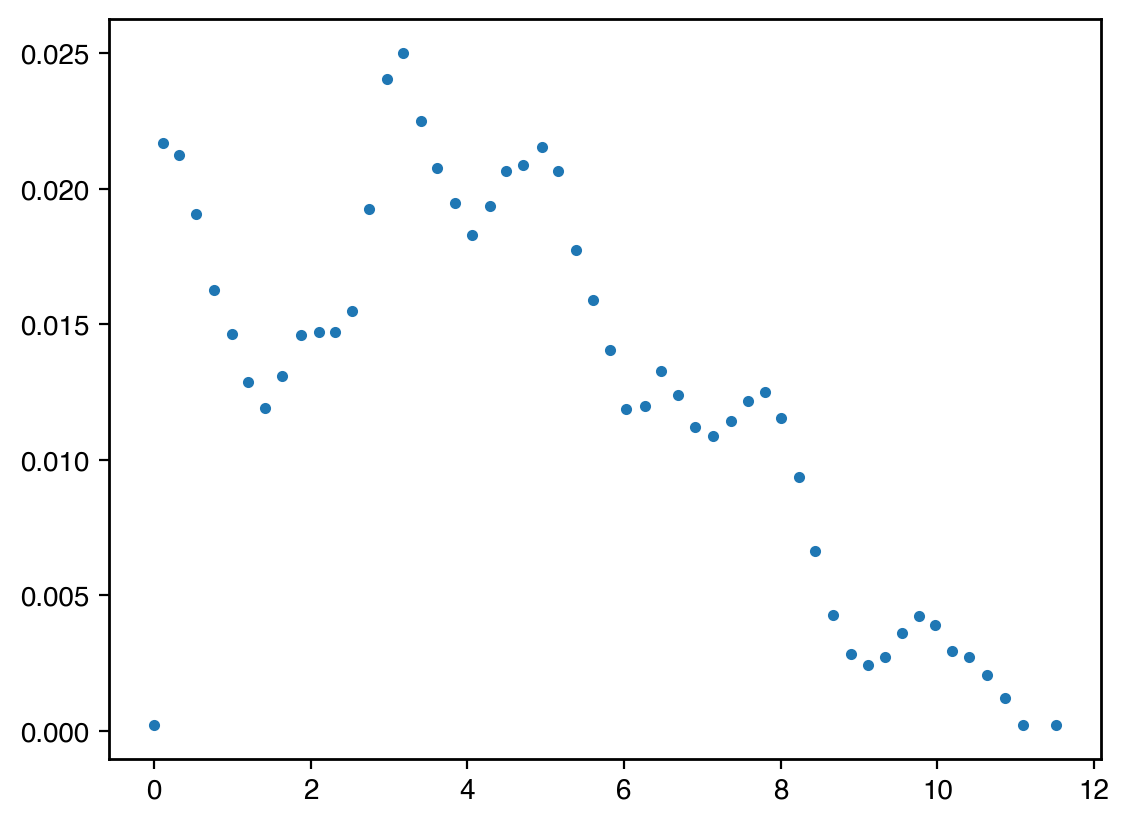

In [32]:
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1],'.')

In [6]:
print(ISO_spectrum.shape)


(53, 2)


In [7]:

def interpolation_function(data_x,data_y,new_x):
    new_y = interp1d(data_x, data_y,fill_value="extrapolate")(new_x)
    return new_y


(1200,)


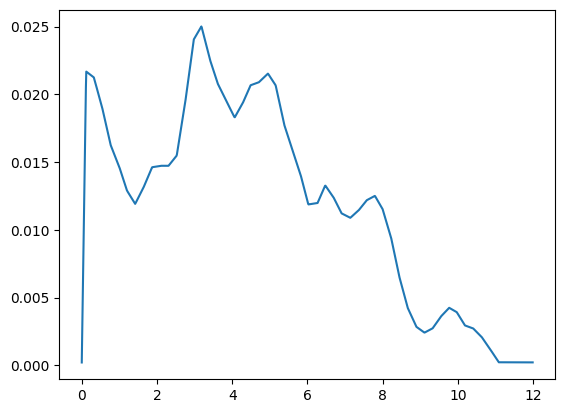

In [10]:
ISO_x =np.arange(0,12,0.01)
ISO_y = interpolation_function(ISO_spectrum[:,0],ISO_spectrum[:,1],ISO_x)
plt.plot(ISO_x,ISO_y)
print(ISO_x.shape)

In [12]:
ISO_y_accumulate = []
for i in np.arange(0,len(ISO_y),1):
    if  i ==0:
        accum = ISO_y[i]
    else:
        accum = ISO_y_accumulate[-1]+ISO_y[i]
    ISO_y_accumulate = np.append(ISO_y_accumulate,accum)


[2.09988052e-04 2.26579621e-03 6.16742447e-03 ... 1.43402997e+01
 1.43405166e+01 1.43407335e+01]


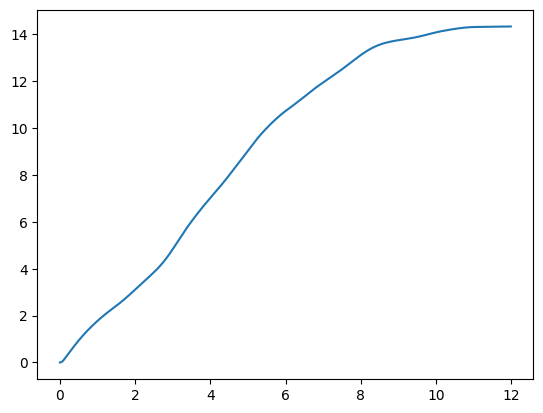

In [13]:
print(ISO_y_accumulate)
plt.plot(ISO_x,ISO_y_accumulate)

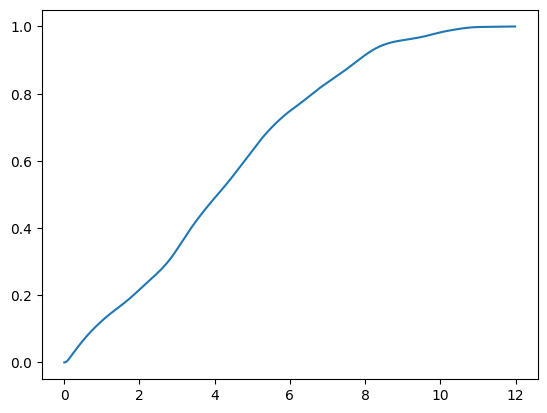

In [14]:
ISO_y_accumulate_n = ISO_y_accumulate/ISO_y_accumulate.max()
plt.plot(ISO_x,ISO_y_accumulate_n)

In [16]:
#np.savetxt("ISO_spectrum_cdf.txt",ISO_y_accumulate_n)


In [25]:
Geatn4_spectrum = np.loadtxt('Geant4_outputAmBe_spectrum.txt')

In [26]:
def sorting(input_data, bin_number ,lower_range, upper_range):
    hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    input_data, #要分析的矩陣
    bins=bin_number, 
    range=(lower_range, upper_range), #範圍
    density=False) #是否Normalized成百分比
    Bin_center = []
    for i in range(len(edges)-1):
        Bin_center_single = round((edges[i]+edges[i+1])/2,2)
        Bin_center = np.append(Bin_center,Bin_center_single)
    
    return Bin_center,hist

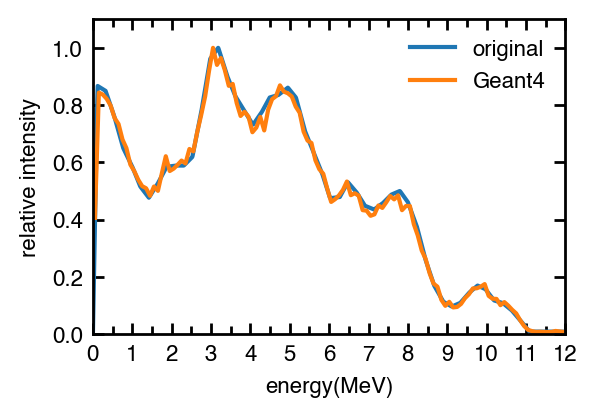

In [49]:

fig = fig_pre_def(6,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          
bin_center, hist = sorting(Geatn4_spectrum,120,0,12)

plt.plot(ISO_x,ISO_y/ISO_y.max(),label='original')
plt.plot(bin_center, hist/hist.max(),label='Geant4')


fig_post_def(xlabel='energy(MeV)', ylabel ='relative intensity',
    xlim=(0,12),ylim=(0,1.1),xticks=(1,0.5),lg_fs=8)
